In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
hr=pd.read_csv(r"C:\ksr\data science\DS_batch1\datasets\HR_comma_sep.csv")

In [3]:
hr.shape

(14999, 10)

In [4]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [5]:
hr=hr.rename(columns=lambda x:x.strip())

In [6]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

In [7]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object

In [8]:
from pycaret.classification import *

In [9]:
clf=setup(data=hr,target="left")

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1181
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(14999, 10)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [11]:
dt=create_model("dt",fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9662,0.9579,0.9420,0.9181,0.9299,0.9076
1,0.9667,0.9623,0.9540,0.9103,0.9316,0.9096
2,0.9738,0.9684,0.9580,0.9337,0.9457,0.9285
3,0.9776,0.9743,0.9680,0.9398,0.9537,0.9389
4,0.9771,0.9740,0.9680,0.9380,0.9528,0.9377
Mean,0.9723,0.9674,0.9580,0.9280,0.9427,0.9245
SD,0.0050,0.0065,0.0097,0.0117,0.0102,0.0134


In [12]:
dt.get_n_leaves

<bound method BaseDecisionTree.get_n_leaves of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1181, splitter='best')>

In [13]:
dt.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1181, splitter='best')>

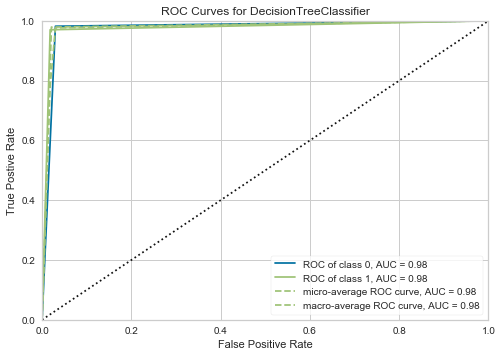

In [14]:
plot_model(dt)

In [26]:
tune_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9743,0.9730,0.9200,0.9705,0.9446,0.9278
1,0.9743,0.9744,0.9320,0.9588,0.9452,0.9284
2,0.9724,0.9843,0.9280,0.9547,0.9412,0.9231
3,0.9657,0.9720,0.9200,0.9350,0.9274,0.9050
4,0.9752,0.9880,0.9520,0.9444,0.9482,0.9319
5,0.9667,0.9756,0.9080,0.9498,0.9284,0.9067
6,0.9724,0.9809,0.9280,0.9547,0.9412,0.9231
7,0.9762,0.9881,0.9320,0.9668,0.9491,0.9336
8,0.9771,0.9853,0.9360,0.9669,0.9512,0.9363
9,0.9666,0.9780,0.9280,0.9317,0.9299,0.9080


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features=19, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1181, splitter='best')

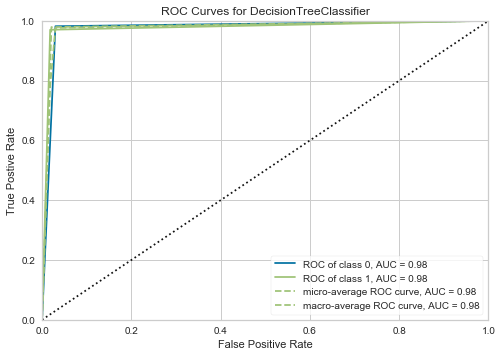

In [21]:
plot_model(dt,plot="auc")

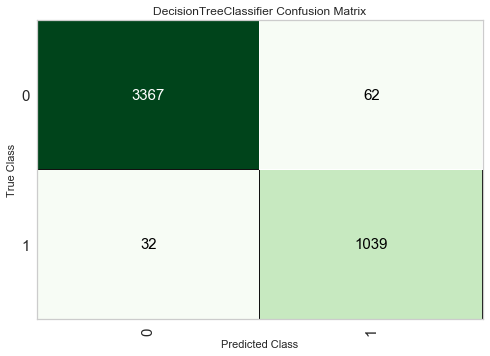

In [22]:
plot_model(dt,plot="confusion_matrix")

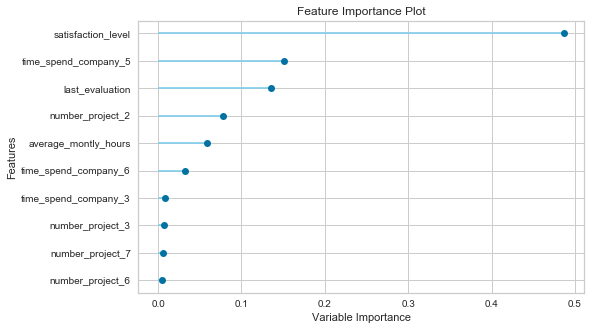

In [23]:
plot_model(dt,plot="feature")

In [24]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

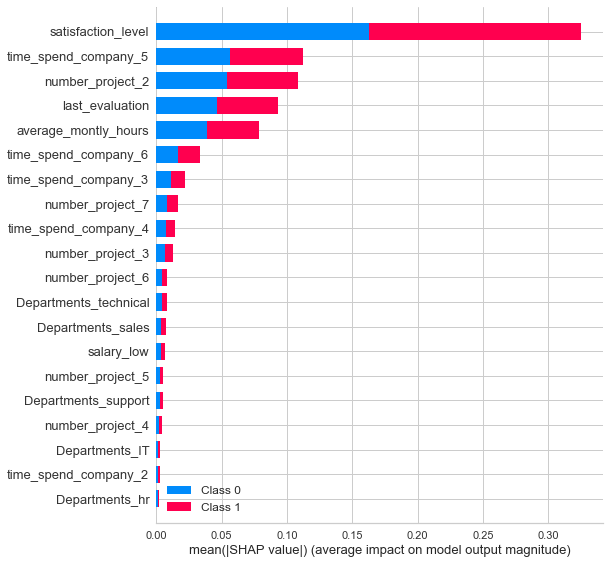

In [25]:
interpret_model(dt)

In [29]:
predict_model(dt,datat=test)

NameError: name 'test' is not defined

In [30]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object

In [31]:
hr.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Departments               10
salary                     3
dtype: int64

In [33]:
clf=setup(data=hr,target="left",silent=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4749
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(14999, 10)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [34]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
hr["number_project"]=hr["number_project"].astype(str)

In [36]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project            object
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object

In [37]:
hr["time_spend_company"]=hr["time_spend_company"].astype(str)

In [38]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [39]:
hr1=pd.get_dummies(hr)

In [40]:
hr1.shape

(14999, 33)

In [41]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(hr1,test_size=0.3,random_state=0)
print(train.shape,test.shape)

(10499, 33) (4500, 33)


In [42]:
x_train=train.drop(["left"],axis=1)
y_train=train["left"]
x_test=test.drop(["left"],axis=1)
y_test=test["left"]

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
dt.score(x_train,y_train)

1.0

In [45]:
dt.score(x_test,y_test)

0.9782222222222222

In [47]:
from sklearn.model_selection import GridSearchCV
param={"max_depth":np.arange(0,100)}
model=GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=10)
model.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='d...
             param_grid={'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 1

In [48]:
model.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
model.score(x_train,y_train)

0.9845699590437185

In [50]:
model.score(x_test,y_test)

0.9815555555555555

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=8)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
abc=list(zip(x_train.columns,dt.feature_importances_))

In [57]:
type(abc)

list

In [61]:
abc1=pd.DataFrame(abc,columns=["var","imp"])

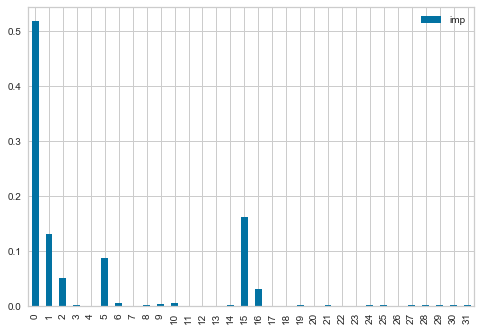

In [64]:
pd.DataFrame(abc,columns=["var","imp"]).plot(kind="bar")

In [66]:
from sklearn.model_selection import GridSearchCV
param={"max_depth":np.arange(0,100),"max_features":np.arange(0,100)}
model=GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=10)
model.fit(x_train,y_train)

KeyboardInterrupt: 